In [2]:
import pandas as pd
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]

Let us import the csv file

In [3]:
BF_sales_dataframe = pd.read_csv("/home/pri/Downloads/BlackFriday.csv",index_col=0)

In [4]:
rawdata = BF_sales_dataframe.reset_index('User_ID')
rawdata.index.name='leftInd'
#print(rawdata)

In [5]:
BF_sales_dataframe.head(100)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,,,,,,,,,,,
1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686


Let us explore Product_Category_1 , Product_Category_2, Product_Category_3 to understand its definition

In [6]:
BF_sales_PC1_Values = BF_sales_dataframe['Product_Category_1'].unique()
BF_sales_PC1_Values.sort()
print(BF_sales_PC1_Values)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


In [7]:
BF_sales_PC2_Values = BF_sales_dataframe['Product_Category_2'].unique()
BF_sales_PC2_Values.sort()
print(BF_sales_PC2_Values)


[  2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.
  17.  18.  nan]


In [8]:
BF_sales_PC3_Values = BF_sales_dataframe['Product_Category_3'].unique()
BF_sales_PC3_Values.sort()
print(BF_sales_PC3_Values)

[  3.   4.   5.   6.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.
  nan]


From the data it is understood that Product_Category_1 is a broad catergory which includes every category
Product_Category_2 is slightly arrow and does not include product category 1
Product_Category_3 does not include product catergory 1 and 2

Let us try and answer some questions now

In [9]:
# Top 5 product interms of sales

BF_Top5_sold_product = BF_sales_dataframe.groupby('Product_ID').size().reset_index(name ='counts')
BF_Top5_sold_product = BF_Top5_sold_product.sort_values(by = 'counts' , ascending=False)
BF_Top5_sold_product.head(5)

,Product_ID,counts
2534,P00265242,1858
1014,P00110742,1591
249,P00025442,1586
1028,P00112142,1539
565,P00057642,1430


In [10]:
# Top 5 product by gender interms of sales
# Top 5 products bought by Men

BF_Top5_sold_product = BF_sales_dataframe.groupby(['Product_ID','Gender']).size().reset_index(name ='counts')
BF_Top5_sold_product_M = BF_Top5_sold_product.loc[BF_Top5_sold_product['Gender'] == 'M'].sort_values(by = 'counts' , ascending=False)
BF_Top5_sold_product_M.head(5)

,Product_ID,Gender,counts
4867,P00265242,M,1353
484,P00025442,M,1245
1927,P00110742,M,1234
1955,P00112142,M,1207
1100,P00057642,M,1174


In [11]:
# Top 5 products bought by Women

BF_Top5_sold_product = BF_sales_dataframe.groupby(['Product_ID','Gender']).size().reset_index(name ='counts')
BF_Top5_sold_product_M = BF_Top5_sold_product.loc[BF_Top5_sold_product['Gender'] == 'F'].sort_values(by = 'counts' , ascending=False)
BF_Top5_sold_product_M.head(5)

,Product_ID,Gender,counts
4866,P00265242,F,505
4011,P00220442,F,427
1105,P00058042,F,378
4687,P00255842,F,366
664,P00034742,F,358


P00265242 and P00220442 was clearly a win with both and men

Let us find the  costliest product sold and how many of them?


In [12]:
BF_sales_dataframe_cost = BF_sales_dataframe.sort_values(by = 'Purchase', ascending=False)
BF_sales_dataframe_cost[['Product_ID','Purchase']].head(5)

,Product_ID,Purchase
User_ID,,
1001474,P00052842,23961
1002272,P00052842,23961
1003160,P00052842,23961
1005848,P00119342,23960
1005596,P00117642,23960


Let us find the list of top 100 returning users

In [13]:
BF_return_user_product = BF_sales_dataframe.groupby('User_ID').size().reset_index(name ='counts')
print(BF_return_user_product)

      User_ID  counts
0     1000001      34
1     1000002      76
2     1000003      29
3     1000004      13
4     1000005     106
5     1000006      46
6     1000007      16
7     1000008      76
8     1000009      57
9     1000010     222
10    1000011      69
11    1000012      11
12    1000013      60
13    1000014      13
14    1000015     116
15    1000016      21
16    1000017     114
17    1000018     179
18    1000019     144
19    1000020      12
20    1000021      13
21    1000022     155
22    1000023     171
23    1000024      76
24    1000025      43
25    1000026     226
26    1000027      41
27    1000028      57
28    1000029      52
29    1000030      30
...       ...     ...
5861  1006011      99
5862  1006012      15
5863  1006013      72
5864  1006014      54
5865  1006015      32
5866  1006016     469
5867  1006017      15
5868  1006018      76
5869  1006019      44
5870  1006020      23
5871  1006021      64
5872  1006022      24
5873  1006023      77
5874  1006

In [14]:

BF_return_user_product_sorted = BF_return_user_product.sort_values(by = 'counts', ascending=False)
#print(BF_return_user_product_sorted.head(10))

In [15]:
#BF_return_user_product_sorted.reset_index()

#BF_return_user_product_sorted.index.name = "rightind"
BF_return_user_product_sorted_100 = BF_return_user_product_sorted.head(100)
print(BF_return_user_product_sorted_100["User_ID"])

1634    1001680
4166    1004277
1885    1001941
1142    1001181
863     1000889
3520    1003618
1111    1001150
981     1001015
2831    1002909
1406    1001449
2006    1002063
4232    1004344
3741    1003841
3297    1003391
416     1000424
4397    1004510
1923    1001980
5647    1005795
1051    1001088
4116    1004227
3708    1003808
5683    1005831
4395    1004508
534     1000549
3135    1003224
3443    1003539
1244    1001285
4429    1004543
3724    1003824
977     1001010
         ...   
1015    1001051
2700    1002777
3939    1004041
1958    1002015
4688    1004808
2829    1002907
1902    1001958
2121    1002181
5886    1006036
2590    1002665
3377    1003471
4273    1004386
1630    1001676
5866    1006016
4127    1004238
191     1000195
3307    1003401
2716    1002793
2435    1002507
4920    1005046
3180    1003272
1684    1001733
4855    1004979
296     1000302
5664    1005812
1341    1001383
3982    1004085
1298    1001340
2457    1002529
2948    1003029
Name: User_ID, Length: 1

In [16]:
top_100_returning_users = rawdata.loc[rawdata['User_ID'].isin(BF_return_user_product_sorted_100['User_ID'])]
#top_100_returning_users[['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years','Marital_Status']]
top_100_unique_returning_users=top_100_returning_users[['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']].drop_duplicates()


In [17]:
returning_users_Occupation= top_100_unique_returning_users.groupby('Occupation').size().reset_index(name='count')
returning_users_Occupation=returning_users_Occupation.sort_values(by = 'count' , ascending=False)
returning_users_Occupation['Occupation'] = returning_users_Occupation.Occupation.astype(str)
#returning_users_Occupation['count'] = returning_users_Occupation.count.astype(str)
print(returning_users_Occupation)

   Occupation  count
4           4   2077
0           0   1827
7           7   1584
19         20   1199
1           1    892
16         17    721
13         14    621
3           3    510
5           5    503
6           6    491
15         16    422
17         18    389
2           2    383
12         12    267
11         11    262
18         19    144
10         10    142
8           8    139
9           9    129
14         15    117


In [21]:
returning_users_Gender= top_100_unique_returning_users.groupby('Gender').size().reset_index(name='count')
returning_users_Gender=returning_users_Gender.sort_values(by = 'count' , ascending=False)

print(returning_users_Gender.dtypes)

Gender    object
count      int64
dtype: object


In [22]:
returning_users_Age= top_100_unique_returning_users.groupby('Age').size().reset_index(name='count')
returning_users_Age=returning_users_Age.sort_values(by = 'count' , ascending=False)
print(returning_users_Age)

     Age  count
2  26-35   5480
3  36-45   3269
1  18-25   2386
4  46-50   1269
6    55+    150
0   0-17    142
5  51-55    123


In [23]:
returning_users_City_Category= top_100_unique_returning_users.groupby('City_Category').size().reset_index(name='count')
returning_users_City_Category=returning_users_City_Category.sort_values(by = 'count' , ascending=False)
print(returning_users_City_Category)

  City_Category  count
0             A   8833
1             B   3986


In [24]:
returning_users_City_Stay_In_Current_City_Years= top_100_unique_returning_users.groupby('Stay_In_Current_City_Years').size().reset_index(name='count')
returning_users_City_Stay_In_Current_City_Years=returning_users_City_Stay_In_Current_City_Years.sort_values(by = 'count' , ascending=False)
print(returning_users_City_Stay_In_Current_City_Years)

  Stay_In_Current_City_Years  count
1                          1   4173
3                          3   2644
4                         4+   2382
0                          0   2317
2                          2   1303


In [25]:
returning_users_Marital_Status= top_100_unique_returning_users.groupby('Marital_Status').size().reset_index(name='count')
returning_users_Marital_Status=returning_users_Marital_Status.sort_values(by = 'count' , ascending=False)
print(returning_users_Marital_Status)

   Marital_Status  count
0               0   7491
1               1   5328


In [26]:
returning_users_Product_Category_1= top_100_unique_returning_users.groupby('Product_Category_1').size().reset_index(name='count')
returning_users_Product_Category_1=returning_users_Product_Category_1.sort_values(by = 'count' , ascending=False)
print(returning_users_Product_Category_1)

    Product_Category_1  count
0                    1   3857
4                    5   2117
1                    2   1581
7                    8   1325
5                    6    821
3                    4    608
2                    3    547
10                  11    500
9                   10    298
12                  13    261
14                  15    238
11                  12    182
6                    7    122
13                  14    110
15                  16     99
17                  18     86
8                    9     34
16                  17     33


In [27]:
returning_users_Product_Category_2= top_100_unique_returning_users.groupby('Product_Category_2').size().reset_index(name='count')
returning_users_Product_Category_2=returning_users_Product_Category_2.sort_values(by = 'count' , ascending=False)
print(returning_users_Product_Category_2)

    Product_Category_2  count
6                  8.0   1601
3                  5.0   1338
13                15.0   1082
0                  2.0   1071
12                14.0   1003
14                16.0    884
2                  4.0    817
4                  6.0    807
11                13.0    675
9                 11.0    618
10                12.0    396
7                  9.0    383
15                17.0    377
16                18.0    202
8                 10.0    184
1                  3.0    171
5                  7.0     43


In [28]:
returning_users_Product_Category_3= top_100_unique_returning_users.groupby('Product_Category_3').size().reset_index(name='count')
returning_users_Product_Category_3=returning_users_Product_Category_3.sort_values(by = 'count' , ascending=False)
print(returning_users_Product_Category_3)

    Product_Category_3  count
12                16.0   1481
11                15.0    877
10                14.0    865
13                17.0    635
5                  9.0    506
4                  8.0    498
8                 12.0    414
9                 13.0    397
14                18.0    351
2                  5.0    280
3                  6.0    185
1                  4.0    134
7                 11.0    113
6                 10.0     95
0                  3.0     54


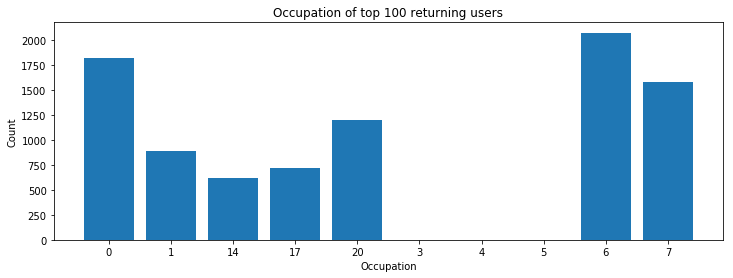

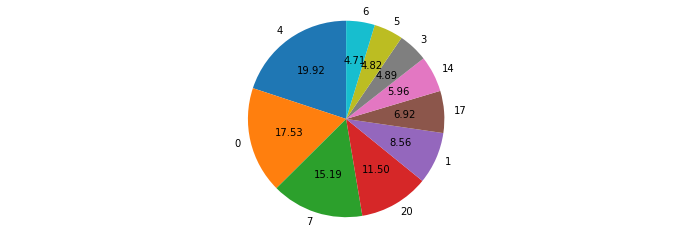

   level_0  index Occupation  count
0        0      4          4   2077
1        1      0          0   1827
2        2      7          7   1584
3        3     19         20   1199
4        4      1          1    892
5        5     16         17    721
6        6     13         14    621
7        7      3          3    510
8        8      5          5    503
9        9      6          6    491


In [64]:
returning_users_Occupation = returning_users_Occupation.head(10)
plt.bar(returning_users_Occupation['Occupation'],returning_users_Occupation['count'])
plt.title('Occupation of top 100 returning users')
plt.xlabel('Occupation')
plt.ylabel('Count')
fig_size[0]= 12
fig_size[1]=4
plt.rcParams["figure.figsize"] = fig_size
#for i, v in enumerate(returning_users_Occupation['count']):
   # plt.text(v + 3, i + 0.25, str(v), color='blue', fontweight='bold')
plt.show()
pieLabels=returning_users_Occupation['Occupation']
figureObject, axesObject = plt.subplots()
axesObject.pie(returning_users_Occupation['count'],

        labels=pieLabels,

        autopct='%1.2f',

        startangle=90)
axesObject.axis('equal')
plt.show()
print(returning_users_Occupation)